In [1]:
import subprocess as sp
import pandas as pd

In [2]:
out, err = sp.Popen(['pacman-history'], stdout=sp.PIPE).communicate()
out = out.decode('utf-8').strip().split('\n')

In [3]:
def split(xs):
    d = {'i': 0, 'ri': 0, 'r':0}
    for l in xs:
        if ' installed ' in l:
            d['i'] += 1
        elif ' reinstalled ' in l:
            d['ri'] += 1
        elif ' removed ' in l:
            d['r'] += 1
    return d

data = {
    f'{k:02d}': split([l for l in out if l.startswith(f'[2019-{k:02d}') or l.startswith(f'[2020-{k:02d}')]) 
    for k in [5,6,7,8,9,10,11,12,1,2,3,4]
}

df = pd.DataFrame.from_dict(data)

In [4]:
df

,05,06,07,08,09,10,11,12,01,02,03,04
i,313,97,86,41,32,23,120,33,118,1,164,685
ri,14,1,6,0,0,0,4,1,4,0,12,5
r,146,67,64,2,5,13,136,13,30,21,115,701


In [5]:
for k in ['i', 'ri', 'r']:
    print(df.loc[k].describe())
    print('-' * 32)

count     12.000000
mean     142.750000
std      190.456927
min        1.000000
25%       32.750000
50%       91.500000
75%      131.000000
max      685.000000
Name: i, dtype: float64
--------------------------------
count    12.000000
mean      3.916667
std       4.776045
min       0.000000
25%       0.000000
50%       2.500000
75%       5.250000
max      14.000000
Name: ri, dtype: float64
--------------------------------
count     12.000000
mean     109.416667
std      193.312492
min        2.000000
25%       13.000000
50%       47.000000
75%      120.250000
max      701.000000
Name: r, dtype: float64
--------------------------------


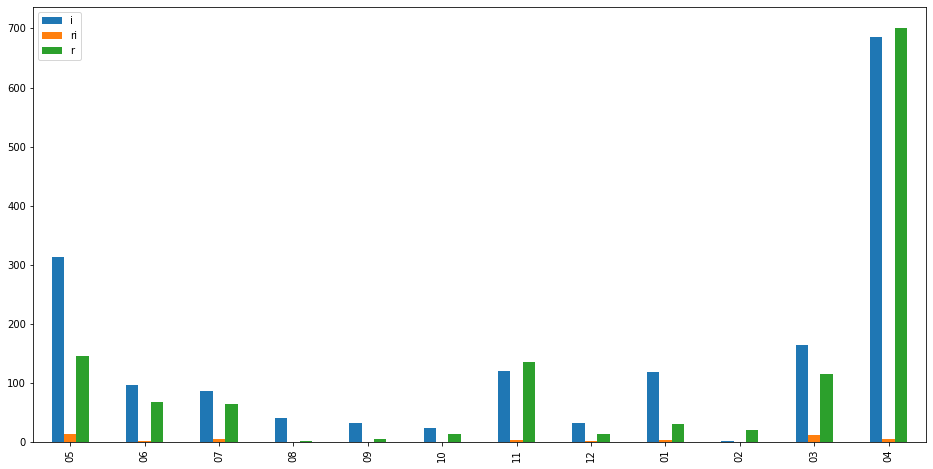

In [6]:
df.transpose().plot.bar(figsize=(16,8))